# Introduction to LangChain and LangGraph

## What is LangChain?

LangChain is a powerful framework for building applications powered by Large Language Models (LLMs). Think of it as a toolkit that helps you create AI-powered applications more easily by providing:

1. [**Components**](https://python.langchain.com/docs/integrations/components/): Ready-to-use building blocks for working with LLMs
2. [**Chains**](https://python.langchain.com/api_reference/langchain/chains.html): Ways to combine these components into useful applications
3. [**Memory**](https://python.langchain.com/api_reference/langchain/memory.html): Tools to help LLMs [remember conversation history
4. [**Agents**](https://python.langchain.com/api_reference/langchain/agents.html): Autonomous AI assistants that can use tools and make decisions

## What is LangGraph?

LangGraph is an extension of LangChain that helps you build stateful, multi-step applications. It's particularly useful for:
- Building conversational agents that remember context
- Creating workflows where each step depends on previous steps
- Managing state and persistence in your applications

## The LangChain Ecosystem

LangChain offers a complete ecosystem for LLM application development:

<img src="https://python.langchain.com/svg/langchain_stack_112024_dark.svg" width="800">

## Key Features of LangChain

1. **Prompts Management**: Easy creation and reuse of prompts
2. **Model Integration**: Support for multiple LLM providers
3. **Chain Building**: Combine multiple steps into pipelines
4. **Memory Systems**: Add memory to your LLM applications
5. **Agents & Tools**: Create AI assistants that can use tools

LangChain was created by Harrison Chase and first released in October 2022. It has since become one of the most popular frameworks for building LLM applications with over [113K GitHub stars](https://github.com/langchain-ai/langchain).

In [1]:
import os
from dotenv import load_dotenv
from IPython.display import HTML, Markdown

In [2]:
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

## [Chat Models](https://python.langchain.com/docs/integrations/chat/)

In [3]:
from langchain_groq import ChatGroq

model = ChatGroq(model="openai/gpt-oss-120b", temperature=0)

In [4]:
response = model.invoke("hi")

response.content

'Hello! How can I help you today?'

## [Working with Prompts Templates](https://python.langchain.com/docs/concepts/prompt_templates/)

LangChain provides powerful tools for working with prompts:

1. **PromptTemplate**: For creating reusable text prompts with variables
2. **ChatPromptTemplate**: For creating structured chat prompts with different message types:
   - `SystemMessage`: Instructions or context for the AI
   - `HumanMessage`: User inputs
   - `AIMessage`: AI responses

Prompt templates help you:
- Keep your prompts consistent
- Make prompts reusable with variables
- Structure multi-turn conversations

In [5]:
# Single Input Variable
from langchain_core.prompts import PromptTemplate

template = PromptTemplate(template="Explain {topic} in simple Term")

prompt = template.format(topic="Large Language Language")

print("Prompt: ", prompt)

Prompt:  Explain Large Language Language in simple Term


In [6]:
response = model.invoke(prompt)

Markdown(response.content)

**Large Language Model (LLM) – a simple, everyday‑style explanation**

---

### 1. What it is, in one sentence  
A **large language model** is a computer program that has read a huge amount of text and learns how to predict the next word in a sentence, so it can write, answer questions, translate, and do many other language‑related tasks.

---

### 2. How it works – the “story” version  

| Step | What happens | Everyday analogy |
|------|--------------|----------------|
| **1. Reading a huge library** | The model is fed billions of words from books, articles, websites, etc. | **Like a kid who reads thousands of books** |
| **2. Learning patterns** | It looks for patterns: “If the sentence says ‘The cat is …’, the next word is often ‘sleeping’ or ‘on the roof’.” | **Like learning that “peanut butter and …” is usually followed by “jelly”.** |
| **3. Guessing the next word** | When you give it a prompt, the model predicts the most likely next word, then the next, and so on, until it forms a full sentence. | **Like playing a game of “fill‑in‑the‑blank”** |
| **4. Using the guess** | The string of predicted words becomes the answer, story, translation, etc. | **Like a storyteller finishing a story you started.** |

---

### 3. Why “large” matters  

- **Lots of data**: The more text it reads, the better it gets at spotting subtle patterns.
- **Big brain (parameters)**: Think of “parameters” as tiny knobs that the model adjusts while learning. A “large” model has billions of these knobs, giving it a finer‑grained sense of language.

---

### 4. What it can do (in simple terms)

| Task | Example |
|------|--------|
| **Answer questions** | “What’s the capital of France?” → “Paris.” |
| **Write text** | Write a short story about a dragon. |
| **Translate** | Turn English into Spanish. |
| **Summarize** | Turn a long article into a short paragraph. |
| **Chat** | Have a conversation like we’re doing now. |

---

### 5. What it can’t do (or does poorly)

- **Understand the world** the way humans do. It only knows what it has seen in text.
- **Feel emotions** or have personal experiences.
- **Guarantee truth** – it can confidently say something that’s wrong if the pattern it learned suggests that answer.

---

### 6. Quick analogy: **The Predictive Text on Your Phone**

- When you type “I’m going to the …”, your phone suggests “store”, “park”, “gym”, etc.  
- A large language model does the same thing, but on a **much larger scale**: it can generate whole paragraphs, not just a single word, and it has learned from **all** the text on the internet, not just your personal messages.

---

### 7. TL;DR (the ultra‑short version)

A **large language model** is a computer program that reads a massive amount of text, learns how words usually follow each other, and then uses that knowledge to generate or understand language—much like a very well‑read, super‑fast “autocomplete” that can write essays, answer questions, translate languages, and more. 

--- 

*Hope that makes the idea clear! If you want a deeper dive into any part (like how the “tiny knobs” work, or how training happens), just let me know.*

In [7]:
# ChatPromptTemplate

from langchain_core.prompts import ChatPromptTemplate

template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are helpfull assistent"),
        ("user", "Summarize the concept of {concept} in 3 bullet points."),
    ]
)

message = template.format(concept="Large Language Model")

message

'System: You are helpfull assistent\nHuman: Summarize the concept of Large Language Model in 3 bullet points.'

In [8]:
response = model.invoke(message)

Markdown(response.content)

- **Statistical pattern learners:** Large Language Models (LLMs) are neural networks trained on massive text corpora to predict the next word (or token) in a sequence, learning statistical patterns, grammar, facts, and reasoning abilities from the data.

- **Scale and architecture:** They typically use transformer architectures with billions (or more) of parameters, enabling them to capture long‑range dependencies and generate coherent, context‑aware text across many domains.

- **Versatile applications:** Once trained, LLMs can be prompted or fine‑tuned for tasks such as translation, summarization, coding, and conversational agents, often achieving performance comparable to or surpassing specialized models.

### Using Message Types
- SystemMessage -- for content which should be passed to direct the conversation
- HumanMessage -- for content in the input from the user.
- AIMessage -- for content in the response from the model.

In [9]:
# Using Message Types
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(content="You are a wise and slightly humorous AI mentor."),
        HumanMessage(content="Can you explain LangChain in one sentence?"),
        AIMessage(content="LangChain is a Python framework that helps you build apps powered by large language models."),
        HumanMessage(content="Great! Can you also give me one real-world use case?"),
    ]
)

message = template.format_messages()

message

[SystemMessage(content='You are a wise and slightly humorous AI mentor.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Can you explain LangChain in one sentence?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='LangChain is a Python framework that helps you build apps powered by large language models.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Great! Can you also give me one real-world use case?', additional_kwargs={}, response_metadata={})]

In [10]:
response = model.invoke(message).content

Markdown(response)

**Use‑case: AI‑powered customer‑support chatbot that pulls in‑depth product knowledge from a company’s internal docs, FAQs, and support tickets, then uses a language model (via LangChain) to understand a user’s question, retrieve the most relevant sections, and generate a helpful, context‑aware response in real time.** 

*Why it shines:*  
- **Document retrieval** (vector‑store search) pulls the exact policy or troubleshooting step the user needs.  
- **Chain orchestration** lets you combine a *retriever* → *LLM* → *post‑processing* (e.g., tone‑adjustment, escalation check) all in one reusable pipeline.  
- **Scalable**: you can add new knowledge bases (manuals, release notes, chat logs) without rewriting the bot—just re‑index and the same chain handles the rest.  

In short, LangChain lets you stitch together “search‑the‑knowledge‑base” + “generate‑the‑answer” + “apply‑business‑rules” into a single, maintainable chatbot. 🚀

## Chains in LangChain

A Chain in LangChain is a sequence of steps that process inputs to produce outputs. There are two ways to create chains:

1. **Classic Chains**: Using classes like `LLMChain`
2. **LCEL (LangChain Expression Language)**: Using the modern pipe operator `|`

LCEL is the recommended way to build chains as it's:
- More flexible
- Easier to debug
- Better for streaming
- More performant

Let's look at examples of both approaches:

### 1. Single-Step Chain (LLMChain)
This is the simplest form — Prompt → LLM → Output.

In [11]:
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain

prompt = PromptTemplate(
    input_variables=["topic"],
    template="Explain {topic} in simple terms and add one fun fact.",
)

chain = LLMChain(llm=model, prompt=prompt)

result = chain.invoke("Quantum Computing")

result

C:\Users\aa304\AppData\Local\Temp\ipykernel_17232\1870853064.py:9: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=model, prompt=prompt)


{'topic': 'Quantum Computing',
 'text': '**Quantum Computing in a nutshell**\n\n1. **Bits vs. Qubits**  \n   - *Classical computer*: uses **bits** that are either **0** or **1**.  \n   - *Quantum computer*: uses **qubits** that can be **0, 1, or both at the same time** (thanks to a property called **super‑position**).\n\n2. **Super‑position**  \n   Think of a spinning coin. While it’s spinning, you can’t say it’s heads *or* tails—it’s in a blend of both. A qubit can hold a blend of 0 and 1 simultaneously, letting a quantum computer explore many possibilities at once.\n\n3. **Entanglement**  \n   When two qubits become **entangled**, the state of one instantly influences the other, no matter how far apart they are. This lets a quantum computer link qubits together in a way that lets them “talk” instantly, giving the machine extra “co‑ordination power”.\n\n4. **Why it matters**  \n   Because a quantum computer can try many solutions at the same time, it can solve certain problems (like f

**LCEL (LangChain Expression Language)**: Using the modern pipe operator `|`

In [13]:
# Runnable chain
# Use pipe | operator to make a chain
from langchain_core.output_parsers import StrOutputParser

chain = prompt | model | StrOutputParser()

response = chain.invoke("Cloud Computing")

Markdown(response)

**What is cloud computing?**  
Think of the cloud as a giant, shared computer that lives on the internet instead of on your own desk. Instead of buying and maintaining your own hardware (like a big server or a bunch of hard drives), you “rent” space and power from this remote computer. You can store files, run apps, and process data on the cloud, and you access everything through the internet—just like you open a website or use an app on your phone. The cloud does the heavy lifting, so your own device can stay small, cheap, and always up‑to‑date.

**Fun fact:** The term “cloud” comes from the old practice of drawing a cloud shape on diagrams to represent the internet. The “cloud” we use today is literally the same symbol—just now it’s a massive, real‑world network of data centers spread across the globe! 🚀

### 2. Multi-Step Chain (SimpleSequentialChain)
This combines two LLM steps, first create an outline, then expand it into a blog post.

In [17]:
from langchain.chains import LLMChain, SimpleSequentialChain

outline_prompt = PromptTemplate(
    input_variables=["topic"],
    template="Create a 3-point outline for a blog post about {topic}.",
)

outline_chain = LLMChain(llm=model, prompt=outline_prompt)

# Step 2: Content generator
content_prompt = PromptTemplate(
    input_variables=["outline"],
    template="Expand this outline into a detailed 200-word blog post:\n{outline}",
)
content_chain = LLMChain(llm=model, prompt=content_prompt)

# Combine into one chain
blog_chain = SimpleSequentialChain(chains=[outline_chain, content_chain])

# Run the full pipeline
final_result = blog_chain.invoke("The Future of Renewable Energy")

final_result

{'input': 'The Future of Renewable Energy',
 'output': '**The Future of Renewable Energy**\n\nThe renewable‑energy landscape is undergoing a rapid transformation, driven by breakthroughs that were once science‑fiction. **Advanced solar solutions**—from perovskite cells that promise 30\u202f% higher efficiency to bifacial panels that harvest light from both sides—are now being deployed on floating platforms that turn reservoirs into power plants. Meanwhile, **next‑generation wind** is taking to the seas and skies: floating offshore turbines tap stronger, steadier winds, while high‑altitude kite and airborne systems capture energy at altitudes where wind speeds are three‑to‑four times higher than on land. The real game‑changer, however, is **storage and grid intelligence**. Solid‑state batteries deliver longer life and faster charging, hydrogen‑based systems store excess power for weeks, and AI‑driven grid optimization balances supply and demand in real time, making intermittent sources 

In [18]:
# Runnable chain

outline_prompt = PromptTemplate(
    input_variables=["topic"],
    template="Create a 3-point outline for a blog post about {topic}.",
)

outline_chain = outline_prompt | model | StrOutputParser()

content_prompt = PromptTemplate(
    input_variables=["outline"],
    template="Expand this outline into a detailed 200-word blog post:\n{outline}",
)
content_chain = content_prompt | model | StrOutputParser()

blog_chain = outline_chain | content_chain | model | StrOutputParser()

# Run the full pipeline
final_result = blog_chain.invoke({"The Future of Renewable Energy"})

Markdown(final_result)

**Summary – The Future of Renewable Energy**

| **Theme** | **Key Points** | **Implications** |
|----------|---------------|----------------|
| **1. Emerging Technologies** | • **Perovskite & bifacial solar** – higher efficiency, lower cost, integration into buildings.<br>• **Floating offshore & bladeless wind** – access to deep‑water resources, reduced noise/maintenance, AI‑optimized layouts.<br>• **Advanced storage** – solid‑state batteries, hydrogen, thermal‑storage systems close the intermittency gap. | Enables higher‑density, ubiquitous generation and reliable, on‑demand renewable power. |
| **2. Economic & Policy Drivers** | • **LCOE decline** – economies of scale, manufacturing efficiencies.<br>• **Policy tools** – carbon pricing, renewable‑portfolio standards, green‑bond financing.<br>• **Corporate procurement & micro‑grids** – direct clean‑power purchases, community‑level resilience.<br>• **Green‑investment funds** – capital directed to projects meeting financial & environmental criteria. | Creates a predictable, investment‑friendly market that accelerates deployment. |
| **3. Societal Impact & Path Forward** | • **Energy equity** – affordable, reliable power for underserved communities and developing nations.<br>• **Smart‑grid & digital‑twin** – real‑time optimization, demand‑response, resilient grid operations.<br>• **Roadmaps (2030‑2050)** – government, industry, academia set milestones; success hinges on collaboration, research, and public‑private partnerships. | Moves the transition from a technology‑only story to a holistic, inclusive, and resilient energy system. |

---

### Why These Trends Matter

1. **Technology‑driven cost reductions** make renewables competitive with fossil fuels without subsidies.
2. **Policy certainty** (e.g., carbon pricing) de‑riskes investments, attracting both institutional and corporate capital.
3. **Storage breakthroughs** eliminate the “intermittency” barrier, enabling renewables to serve baseload demand.
4. **Equity focus** ensures that the transition benefits all socioeconomic groups, reducing the global energy divide.
5. **Digital integration** (smart grids, digital twins) maximizes efficiency, reduces waste, and improves reliability.

---

### Actionable Takeaways

| **For Policymakers** | **For Investors & Corporates** | **For Researchers & Innovators** |
|----------------------|------------------------------|--------------------------------|
| • Strengthen carbon‑pricing mechanisms and expand renewable‑portfolio standards.<br>• Incentivize community‑owned micro‑grids and energy‑justice programs. | • Allocate capital to projects with clear ESG metrics and proven technology readiness.<br>• Use corporate power purchase agreements (PPAs) to lock in clean‑energy supply. | • Accelerate scaling of perovskite and solid‑state battery production.<br>• Develop AI‑driven grid‑optimization tools and digital‑twin platforms. |
| • Support financing tools (green bonds, climate‑finance) for early‑stage projects. | • Diversify procurement: combine utility‑scale, distributed, and storage assets. | • Focus on low‑cost, high‑durability materials for offshore and floating wind. |
| • Promote energy‑equity programs (subsidies, community‑ownership models). | • Partner with local utilities to integrate micro‑grids and demand‑response programs. | • Collaborate with policy makers to align research roadmaps with 2030‑2050 targets. |

---

### Outlook to 2050

- **2030:** >50 % of global electricity from renewables; widespread adoption of perovskite solar and floating offshore wind; solid‑state batteries in commercial use.
- **2040:** Grid‑scale storage (hydrogen, thermal) provides >30 % of system flexibility; smart‑grid and digital‑twin platforms become standard.
- **2050:** Near‑zero‑carbon electricity grid in most developed nations; energy‑equity metrics integrated into national energy plans; global renewable share >80 % with residual fossil use limited to hard‑to‑decarbonize sectors.

---

**Bottom line:** The convergence of cutting‑edge technology, supportive policy frameworks, and a focus on equity is turning clean energy from a hopeful vision into an inevitable reality. The next decade will be decisive—those who invest, innovate, and legislate now will shape a resilient, inclusive, and sustainable energy landscape for generations to come.

# Memory in LangChain and LangGraph

LLMs are stateless by default - they don't remember previous conversations. LangChain provides two ways to add memory:

1. **LangChain Memory**: Traditional memory systems like `ConversationBufferMemory` (Deprecated)
   - Simple to use
   - Good for basic chatbots
   - Limited scalability

2. **LangGraph State Management**: Modern approach using `StateGraph` & `MemorySaver`
   - Better for production use
   - Supports multiple users/threads
   - More scalable
   - Better persistence options

> Let's use the second approach provided by LangGraph.

# Conversation History with LangGraph MemorySaver

We'll go over an example of how to design and implement an LLM-powered chatbot. This chatbot will be able to have a **conversation** and **remember previous interactions** with a chat model.

Source: [LangChain Docs](https://python.langchain.com/docs/tutorials/chatbot/)

`ChatModels` in LangChain work like special objects called "Runnables", which means they have a common way you can use them.
If you just want to run the model, you give it a list of messages and use the `.invoke` method — that’s how you “talk” to it and get a response.

It’s like: “Put your messages in a box, hand it to the .invoke button, and the model will answer.”

In [24]:
response = model.invoke([HumanMessage(content="Hi! I am Saad.")])

Markdown(response.content)

Hello Saad! 👋 Nice to meet you. How can I help you today?

The model on its own does not have any concept of state. For example, if you ask a followup question:

In [26]:
response = model.invoke([HumanMessage(content="What's my name?")])

Markdown(response.content)

I’m sorry, but I don’t have any information about your name. If you’d like to share it, I’ll be happy to address you by that name in our conversation!

We can see that it doesn't take the previous conversation turn into context, and cannot answer the question. This makes for a terrible chatbot experience!

To get around this, we need to pass the entire [conversation history](https://python.langchain.com/docs/concepts/chat_history/) into the model. Let's see what happens when we do that:

In [28]:
response = model.invoke(
    [
        HumanMessage(content="Hi! I am Saad."),
        AIMessage(content="Hello Saad! 👋 Nice to meet you. How can I assist you today?"),
        HumanMessage(content="Who am I?"),
    ]
)

Markdown(response.content)

You introduced yourself as **Saad**. 😊 If there’s anything specific you’d like to talk about or any question you have, just let me know!

And now we can see that we get a good response!

This is the basic idea underpinning a chatbot's ability to interact conversationally. So how do we best implement this?

# Message persistence


LangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.

Wrapping our chat model in a minimal LangGraph application allows us to automatically persist the message history, simplifying the development of multi-turn applications.

LangGraph comes with a simple in-memory checkpointer, which we use below. See its [documentation](https://langchain-ai.github.io/langgraph/concepts/persistence/?_gl=1*fi5jbl*_gcl_au*MTE0NDQ3MDcyNC4xNzU0OTExODMx*_ga*MTU2Mzg1ODA3NS4xNzQ5NjMyNjk5*_ga_47WX3HKKY2*czE3NTQ5MTE4MjYkbzckZzEkdDE3NTQ5MTE4MzckajQ5JGwwJGgw) for more detail, including how to use different persistence backends (e.g., SQLite or Postgres).

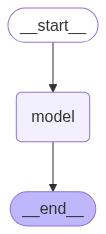

In [29]:
# Modern usage with LangGraph: Production-friendly way to store chat state.
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

# Define a new graph
workflow = StateGraph(state_schema=MessagesState)


# Define the function that calls the model
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": response}


# Define the (single) node in the graph
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

# Add memory
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)
app

We now need to create a `config` that we pass into the runnable every time. This config contains information that is not part of the input directly, but is still useful. In this case, we want to include a `thread_id`. This should look like:

In [30]:
config = {"configurable": {"thread_id": "abc123"}}

This enables us to support multiple conversation threads with a single application, a common requirement when your application has multiple users.

We can then invoke the application:

In [31]:
query = "Hi! I am Saad."

input_messages = [HumanMessage(content=query)]

output = app.invoke({"messages": input_messages}, config)

output

{'messages': [HumanMessage(content='Hi! I am Saad.', additional_kwargs={}, response_metadata={}, id='246012ff-1fef-4b93-bdf2-fc730d8118c7'),
  AIMessage(content='Hello Saad! 👋 Nice to meet you. How can I help you today?', additional_kwargs={'reasoning_content': 'The user says "Hi! I am Saad." Probably a greeting. We should respond friendly. No special instructions. So respond with greeting.'}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 78, 'total_tokens': 135, 'completion_time': 0.113675522, 'prompt_time': 0.004576473, 'queue_time': 0.001326876, 'total_time': 0.118251995}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_4a19b1544c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--4209ed58-3e49-403b-b0be-925e7a9972d5-0', usage_metadata={'input_tokens': 78, 'output_tokens': 57, 'total_tokens': 135})]}

In [32]:
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Hello Saad! 👋 Nice to meet you. How can I help you today?


In [33]:
query = "Do you know my name?"

input_messages = [HumanMessage(content=query)]

output = app.invoke({"messages": input_messages}, config)

output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Yes, you told me your name is **Saad**. 😊 How can I assist you today, Saad?


Great! Our chatbot now remembers things about us. If we change the config to reference a different `thread_id`, we can see that it starts the conversation fresh.

In [34]:
new_config = {"configurable": {"thread_id": "xyz890"}}

query = "Do you know my name?"

input_messages = [HumanMessage(content=query)]

output = app.invoke({"messages": input_messages}, config=new_config)

output["messages"][-1].pretty_print()

================================== Ai Message ==================================

I don’t know your name unless you tell me. If you’d like to share it, feel free! Otherwise, I’m happy to help with any question you have.


However, we can always go back to the original conversation (since we are persisting it in a database)

In [35]:
query = "Do you know my name?"

input_messages = [HumanMessage(query)]

output = app.invoke({"messages": input_messages}, config)

output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Yes, you introduced yourself as **Saad**. How can I help you today, Saad?


This is how we can support a chatbot having conversations with many users!

## Next Steps

Now that you understand the basics of LangChain and LangGraph, you can:

1. **Explore More Components**:
   - Document loaders
   - Vector stores
   - Structured output
   - Tools and agents

2. **Learn Advanced Features**:
   - Custom chains
   - Advanced agents
   - Async operations
   - Streaming responses

3. **Build Production Applications**:
   - Use LangSmith for monitoring
   - Deploy with LangServe
   - Implement proper error handling
   - Add security measures

Check out the [LangChain documentation](https://python.langchain.com/docs/get_started/introduction) for more examples and tutorials.